# Iris Classification Dataset
Here, PyTorch Framework is used to create a simple neural network that classifies iris flowers into species based on measurements of their petals and sepals.

> The iris classification model is a very common machine learning example, and the iris dataset is often the basis for "hello world" sample code for a wide range of machine learning frameworks. In reality, this problem can be solved easily using classical machine learning techniques without the need for a deep learning model; but it's a useful, easy to understand dataset with which to demonstrate the principles of neural networks in this notebook.

<img src="img/iris_petal_sepal.png">

### Exploring the Iris Dataset

The Iris dataset was used in Taxonomic Problems. It can be found on the <a href="https://archive.ics.uci.edu/ml/datasets/iris">UCI Machine Learning Repository</a>

It consists of 50 samples each of three different iris species as well as some properties about each flower. Here one of the flower is linearly seperable from the other two, but the other two are not linearly seperable from each other.

The four features of the dataset are:
    - Sepal Length (cm)
    - Sepal Width (cm)
    - Petal Length (cm)
    - Petal Width (cm)
    
There are three classes in the dataset:
    - Iris-setosa 
    - Iris-versicolor
    - Irish-virginica

### Required Libraries
1. <a href="https://scipy.org/install.html">Numpy</a>
2. <a href="https://scipy.org/install.html">Pandas</a>
3. <a href="https://scipy.org/install.html">Matplotlib</a>
4. <a href="https://pypi.org/project/scikit-learn/">Scikit-Learn</a>
5. <a href="https://pytorch.org/get-started/locally/">PyTorch</a>

In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Extracting and Preprocessing Data

Here, iris dataset which is in ".csv" file is extracted to pandas dataframe. The labels (classes) of iris flower is then encoded such that the labels are converted into unique numbers.

In [402]:
# Reading iris dataset as pandas dataframe 
dataframe = pd.read_csv("dataset/iris.csv")

In [403]:
dataframe.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [404]:
X = dataframe.iloc[:, 1:-1].values
y = dataframe.iloc[:, -1].values
print("Input Features Shape: ", X.shape)
print("Output Classes Shape: ", y.shape)

Input Features Shape:  (150, 4)
Output Classes Shape:  (150,)


In [405]:
# Encoding the Species
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(y[:])

In [406]:
# Here the encoding is done as:
# 1. 0 --> Iris-setosa
# 2. 1 --> Iris-versicolor
# 3. 2 --> Iris-virginica
class_names = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
# Changing the rank 0 matrix into column (Rank 1) matrix
#Y.reshape(-1, 1).shape

In [407]:
# Spliting the dataset into the Traning set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=22) #0

# Neural Network Model

In [408]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.2.0


### Prepare the Data for Pytorch

PyTorch makes use of dataloaders to load training and validation data in batches. Here data is already loaded into numpy arrays, but these data should be wrap into PyTorch Datasets (in which data is converted into PyTorch tensor objects) and data loaders are created to read batches.

In [409]:
# Create a dataset and loader for the training data and labels
x_train = torch.Tensor(X_train).float()
y_train = torch.Tensor(Y_train).long()
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=4,
    shuffle=False, num_workers=1)

# Create a dataset and loader for the test data and labels
x_test = torch.Tensor(X_test).float()
y_test = torch.Tensor(Y_test).long()
test_dataset = utils.TensorDataset(x_test,y_test)
test_loader = td.DataLoader(test_dataset, batch_size=4,
    shuffle=False, num_workers=1)

print("Train and Test Loaders are ready")
print("X Train dataset shape: ", x_train.shape)
print("X Test dataset shape: ", x_test.shape)
print("Y Train dataset shape: ", y_train.shape)
print("Y Test dataset shape: ", y_test.shape)


Train and Test Loaders are ready
X Train dataset shape:  torch.Size([90, 4])
X Test dataset shape:  torch.Size([60, 4])
Y Train dataset shape:  torch.Size([90])
Y Test dataset shape:  torch.Size([60])


## Define a Neural Network

Now,data is ready. The architecture of neural network building is the next step. Here, we will be building a network that consists of 3 fully connected(Linear) layers:
* An input layer that receives four input values (the iris features) and applies ReLU activation function.
* A hidden layer that receives 10 inputs and applies a ReLu activation function.
* An output layer that uses a softmax activation function to generate three outputs ( which represents the probabilities for the three iris species)

In [415]:
# Number of Hidden Layers

h1 = 15
h2 = 10

# class defining the Neural Network
class DeepIrisNet(nn.Module):
    def __init__(self):
        super(DeepIrisNet, self).__init__()
        self.input = nn.Linear(4, h1)
        self.hl1 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, 3)
        
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hl1(x))
        x = self.out(x)
        return x

# Create a model Instance from the network
model = DeepIrisNet()
print(model)

DeepIrisNet(
  (input): Linear(in_features=4, out_features=15, bias=True)
  (hl1): Linear(in_features=15, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)


### Training the Model
To train the model, we need to repeatedly feed the training values forward through the network. We need to use a loss function to calculate the loss, an optimizer to backpropagate the weight and bias value adjustments, and validate the model using the test data we withheld.

To do this, we'll create a function to train and optimize the model and fuction to test the model. Then we'll call these functions iteratively over epochs, logging the loss and accuracy statistics for each epoch

In [418]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss=0
    correct=0
    
    for batch, tensor in enumerate(data_loader):
        data, label = tensor
        # forward propagation
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, label)
        train_loss += loss.item()
        
        # Back Propagation
        loss.backward()
        optimizer.step()
    
        # calculate the accuracy
        _, predicted = torch.max(out.data, 1)
        correct += torch.sum(label==predicted).item()
        
    avg_accuracy = correct / len(data_loader.dataset)
    # Returning the average loss
    avg_loss = train_loss / len(data_loader.dataset)
    return avg_loss, avg_accuracy

def test(model, data_loader):
    # switch the model to evaluation mode ( so we only do forward propagation)
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for batch, tensor in enumerate(data_loader):
            data, label = tensor
            # Get the prediction
            out = model(data)
            
            # calculate the loss
            test_loss += loss_criteria(out, label).item()
            
            # calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(label==predicted).item()
            
    # return validation loss and prediction accuracy for each epoch
    avg_accuracy = correct / len(data_loader.dataset)
    avg_loss = test_loss / len(data_loader.dataset)
    return avg_loss, avg_accuracy

# specify the loss criteria (Cross Entropy Loss for Multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Specify the optimizer ( Here Stochastic Gradient Descent optimizer is used)
learning_rate = 0.01
learning_momentum = 0.9
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=learning_momentum)

# track metrices for each epoch in arrays
epoch_nums = []
training_loss = []
validation_loss = []

# train over 100 epochs
epochs = 100
for epoch in range(1, epochs+1):
    # feeding the training data into the model to optimize the weights
    train_loss, train_acc = train(model, train_loader, optimizer)
    
    # feeding the test data into the model to check its performance
    test_loss, accuracy = test(model, test_loader)
    
    # log the metrices for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    
    if epoch % 10 == 0:
        print('Epoch {:d}: TrainLoss= {:.4f}, TrainAaccuracy= {:.4%}, ValLoss: {:.4f}, ValAccuracy= {:.4%}'.format(epoch, train_loss,train_acc, test_loss, accuracy))

Epoch 10: TrainLoss= 0.0267, TrainAaccuracy= 92.2222%, ValLoss: 0.0083, ValAccuracy= 100.0000%
Epoch 20: TrainLoss= 0.0436, TrainAaccuracy= 92.2222%, ValLoss: 0.0117, ValAccuracy= 100.0000%
Epoch 30: TrainLoss= 0.0249, TrainAaccuracy= 92.2222%, ValLoss: 0.0104, ValAccuracy= 100.0000%
Epoch 40: TrainLoss= 0.0240, TrainAaccuracy= 93.3333%, ValLoss: 0.0110, ValAccuracy= 100.0000%
Epoch 50: TrainLoss= 0.0253, TrainAaccuracy= 93.3333%, ValLoss: 0.0124, ValAccuracy= 100.0000%
Epoch 60: TrainLoss= 0.0243, TrainAaccuracy= 93.3333%, ValLoss: 0.0111, ValAccuracy= 100.0000%
Epoch 70: TrainLoss= 0.0391, TrainAaccuracy= 92.2222%, ValLoss: 0.0150, ValAccuracy= 100.0000%
Epoch 80: TrainLoss= 0.0290, TrainAaccuracy= 92.2222%, ValLoss: 0.0070, ValAccuracy= 100.0000%
Epoch 90: TrainLoss= 0.0480, TrainAaccuracy= 91.1111%, ValLoss: 0.0096, ValAccuracy= 98.3333%
Epoch 100: TrainLoss= 0.0271, TrainAaccuracy= 93.3333%, ValLoss: 0.0081, ValAccuracy= 100.0000%


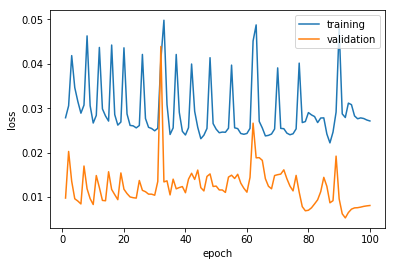

In [419]:
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [420]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          # and label them with the respective list entries
          xticklabels = classes, yticklabels=classes,
          title=title,
          ylabel='True Label',
          xlabel='Predicted Label')
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # loop over data dimensions and create text annotations
    fmt = 'd'
    thres = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i,j] > thresh else "black")
    fig.tight_layout()
    return ax

[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


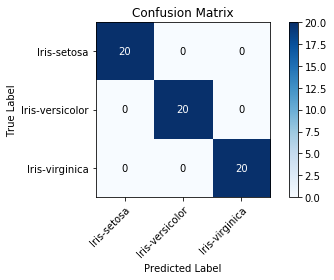

In [421]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(X_test).float()
_, predicted = torch.max(model(x).data, 1)

plot_confusion_matrix(y_test, predicted, class_names, title='Confusion Matrix' )

In [422]:
x_new = [[6.6,3.2,5.8,2.4]]
print ('New sample: {}'.format(x_new[0]))

model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',class_names[predicted.item()])

New sample: [6.6, 3.2, 5.8, 2.4]
Prediction: Iris-virginica


In [423]:
# Creating a checkpoint dictionary, saving model and its state and optimizer state as well.
# Saving dictionary to file , extension .pth,.pt,.pkl
checkpoint = {'model': model,
             'state_dict': model.state_dict(),
             'optimizer': optimizer.state_dict()}
torch.save(checkpoint, 'checkpoint.pth')

In [424]:
# Loading saved model state to my_model
# Creating model from saved state and switching it to evalulation mode for inference
def load_checkpoint(model_path):
  checkpoint=torch.load(model_path)
  model=checkpoint["model"]
  
  model.load_state_dict(checkpoint["state_dict"])
  
  for parameter in model.parameters():
    parameter.requires_grad=False

  model.eval()
  return model

my_model=load_checkpoint("checkpoint.pth")

In [425]:
my_model

DeepIrisNet(
  (input): Linear(in_features=4, out_features=15, bias=True)
  (hl1): Linear(in_features=15, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)

In [426]:
# Test set accuracy
correct=0
for i,(data,label) in enumerate(test_loader):
  output=my_model.forward(data)
  max_val,prediction=torch.max(output.data,1)
  correct+=(((prediction==label).sum().item())/len(label))
print(correct/len(test_loader)*100)

100.0
